In [32]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

import coremlv2
import importlib
importlib.reload(coremlv2)

<module 'coremlv2' from 'C:\\Users\\Jonathan Raditya\\documents\\#PROJECT\\idx\\coremlv2.py'>

In [ ]:
def merge_all_stock(ROOT_PATH):
    db_path = f'{ROOT_PATH}idx_indicators.db'
    db_conn = sqlite3.connect(db_path)
    tickers = coremlv2.stock_metadata(ROOT_PATH)
    excluded_stocks = coremlv2.excluded_stock()
    tickers = [ticker for ticker in tickers['ticker'].values if ticker not in excluded_stocks]
    
    frames = []
    first = True
    count = 0
    for ticker in tickers:
        if first:
            first = False
            pass
        elif not first:
            del df

        df = pd.read_sql(f'select * from {ticker}', db_conn)
        df = (df - df.mean()) / df.std()
        frames.append(df)
        count+=1
        if count % 50 == 0:
            print(f'{count}/{len(tickers)}: {ticker}')
    result = pd.concat(frames)
    result = result.reset_index(drop=True)
    return result

In [64]:
db_path = './idx_indicators.db'
db_conn = sqlite3.connect(db_path)

db_merge = './idx_merges.db'
db_merge_conn = sqlite3.connect(db_merge)

In [65]:
tickers = coremlv2.stock_metadata()
excluded_stocks = coremlv2.excluded_stock()
tickers = [ticker for ticker in tickers['ticker'].values if ticker not in excluded_stocks]

In [66]:
frames = []
first = True
count = 0
for ticker in tickers:
    if first:
        first = False
        pass
    elif not first:
        del df
        
    df = pd.read_sql(f'select * from {ticker}', db_conn)
    df = (df - df.mean()) / df.std()
    frames.append(df)
    count+=1
    print(f'{count}/{len(tickers)}: {ticker}')
    
result = pd.concat(frames)
result = result.reset_index(drop=True)

1/739: AHAP
2/739: MYTX
3/739: AKPI
4/739: ANJT
5/739: BNBA
6/739: BMAS
7/739: NISP
8/739: BSWD
9/739: BKSW
10/739: BAYU
11/739: RMBA
12/739: BBLD
13/739: DLTA
14/739: PDES
15/739: EMTK
16/739: EPMT
17/739: GSMF
18/739: ERTX
19/739: ESTI
20/739: FAST
21/739: FISH
22/739: GEMS
23/739: BRAM
24/739: PTIS
25/739: INDR
26/739: JKSW
27/739: KBLM
28/739: KICI
29/739: KOIN
30/739: LMAS
31/739: LMSH
32/739: FPNI
33/739: MFIN
34/739: MREI
35/739: MTSM
36/739: MKPI
37/739: MFMI
38/739: OCAP
39/739: PGLI
40/739: TMAS
41/739: NELY
42/739: RODA
43/739: PTSP
44/739: PLIN
45/739: POOL
46/739: PSDN
47/739: PALM
48/739: PNSE
49/739: RELI
50/739: RICY
51/739: RIGS
52/739: SMDR
53/739: SKBM
54/739: BATA
55/739: SMRU
56/739: SONA
57/739: SCCO
58/739: SSTM
59/739: TOTO
60/739: SMDM
61/739: TFCO
62/739: TGKA
63/739: TPMA
64/739: TRST
65/739: ABMM
66/739: ACES
67/739: ACST
68/739: ADRO
69/739: ADHI
70/739: ASSA
71/739: ADMF
72/739: APLN
73/739: ADES
74/739: AIMS
75/739: AKRA
76/739: ASRI
77/739: ALDO
78/739: 

In [67]:
result.to_sql('idx', db_merge_conn, if_exists='replace')

In [68]:
result

,time,open,high,low,close,Volume,change,Volume_rank,rsi14,candle_I0,...,change_srp,close_rel,change_b1f3,change_b1f5,change_b1f7,change_b1f10,close_EMA3_G_s1,close_EMA3_G_s2,close_EMA10_G_s1,close_EMA10_G_s2
0,-1.739286,-0.283378,-0.239527,-0.443213,-0.422445,6.356840,NaN,2.800693,NaN,1.259140,...,NaN,-0.422445,NaN,NaN,NaN,NaN,0.914102,0.456618,0.730800,0.597578
1,-1.738765,-0.420063,-0.293335,-0.387778,-0.285542,2.385602,1.153485,2.687684,NaN,-1.228000,...,-1.505461,-0.285542,-1.134697,-1.354468,-1.572831,-1.715627,0.456413,-2.884449,0.597440,-2.005221
2,-1.738245,-0.256040,-0.185718,-0.249192,-0.285542,1.818148,-0.026881,2.552073,NaN,0.264285,...,0.658297,-0.285542,-0.941179,-2.054376,-1.888145,-1.707449,-2.884718,-0.710465,-2.005501,-1.054339
3,-1.737724,-0.256041,-0.212623,-0.748103,-0.751011,9.658477,-3.798367,2.936304,NaN,4.492427,...,-2.351332,-0.751011,-2.092447,-2.165561,-2.091403,-1.707449,-0.710692,0.742669,-1.054567,0.017029
4,-1.737203,-0.748108,-0.669995,-0.748103,-0.641489,4.604346,1.089105,2.732887,NaN,-0.979287,...,-1.556112,-0.641489,-0.206616,-0.192835,-0.697843,-0.410750,0.742469,-1.276846,0.016860,-1.306713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966859,1.378601,-0.010447,-0.163681,0.043538,-0.105733,-0.703287,-0.537000,-1.323622,-0.732352,0.151174,...,NaN,-0.105733,-0.267530,NaN,NaN,NaN,-0.468620,-0.169765,-0.574169,-0.419418
1966860,1.444685,-0.236109,-0.353761,-0.046026,-0.282774,-0.709834,-0.393700,-1.334713,-1.034081,0.007957,...,NaN,-0.282774,-0.075498,NaN,NaN,NaN,-0.197162,0.225511,-0.441914,-0.108693
1966861,1.510770,-0.311329,-0.467810,-0.046026,-0.238513,-0.684980,0.007834,-1.112877,-0.946740,-0.206869,...,NaN,-0.238513,NaN,NaN,NaN,NaN,0.198880,0.098387,-0.128482,-0.108777
1966862,1.576855,-0.311329,-0.277729,-0.001244,-0.017212,-0.491983,0.332818,-0.380818,-0.499692,-0.564912,...,NaN,-0.017212,NaN,NaN,NaN,NaN,0.071510,NaN,-0.128567,NaN


(-5.0, 5.0)

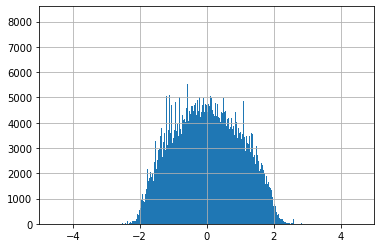

In [87]:
result['rsi14_srp'].hist(bins=1000)
plt.xlim([-5,5])